In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support, roc_auc_score
from graphviz import Source
from IPython.display import display , SVG
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib
import pylab as pl
import os
matplotlib.style.use('ggplot')

In [44]:
credits = pd.read_csv ('C://Users//69//Desktop//bigdata/zachet/german_credit_data.csv')
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [45]:
credits.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [46]:
credits = credits.rename(columns = {"Saving accounts":"Saving_accounts", 
                                    "Checking account":"Checking_account", 
                                    "Credit amount":"Credit_amount",
                                    "Unnamed: 0":"ID",
                                
                                   })
credits.head()

,ID,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [47]:
credits= credits.fillna('no_informations')
interval = (18, 25, 35, 60, 120)#почему

cats = ['Student', 'Young', 'Adult', 'Senior']
credits["Age_cat"] = pd.cut(credits.Age, interval, labels=cats)
credits.head()

,ID,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,no_informations,little,1169,6,radio/TV,good,Senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,2,49,male,1,own,little,no_informations,2096,12,education,good,Adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult


In [48]:
credits = credits.merge(pd.get_dummies(credits.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
credits = credits.merge(pd.get_dummies(credits.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
credits = credits.merge(pd.get_dummies(credits.Age_cat, drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)
credits = credits.merge(pd.get_dummies(credits.Risk, prefix='Risk'), left_index=True, right_index=True)
credits = credits.merge(pd.get_dummies(credits.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
credits = credits.merge(pd.get_dummies(credits.Saving_accounts, drop_first=True, prefix='Saving_accounts'), left_index=True, right_index=True)
credits = credits.drop(['Sex', 'Housing', 'Checking_account', 'Age','Age_cat','Risk','Purpose','Saving_accounts'],axis=1)
credits.head()


,ID,Job,Credit_amount,Duration,Sex_male,Housing_own,Housing_rent,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Saving_accounts_moderate,Saving_accounts_no_informations,Saving_accounts_quite rich,Saving_accounts_rich
0,0,2,1169,6,1,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,2,5951,48,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,2096,12,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2,7882,42,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,4,2,4870,24,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = credits.drop(['Risk_bad','Risk_good'], axis=1)
y = credits["Risk_bad"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [51]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt = dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
predict_t = dt.predict_proba(X_test)
first_score = accuracy_score(y_test,predicted)
first_PR = precision_recall_fscore_support(y_test, predicted, average='macro')

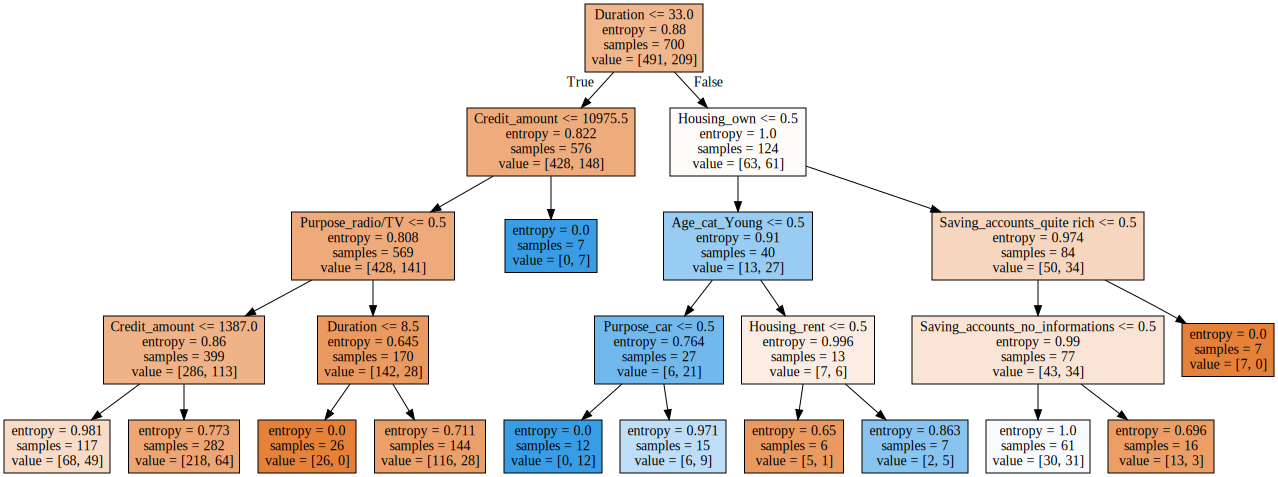

In [52]:

os.environ["PATH"] += os.pathsep + 'D:/programs/anaconda/Library/bin/graphviz'
graph = Source(tree.export_graphviz(dt, out_file=None,
                                    feature_names=list(X),
                                    filled=True))
display(SVG(graph.pipe(format='svg')))#цвета значение

In [53]:
dt2 = DecisionTreeClassifier(criterion='entropy',splitter='best')

In [54]:
parameters = {'max_depth':[9,15,20], 'min_samples_split':[10,15,20,30,40,50], 'min_samples_leaf':[3,4,5]}
search = GridSearchCV(dt2, parameters, cv=5)

In [55]:
 search = search.fit(X_train, y_train)

In [56]:
search.best_params_


{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 15}

In [57]:
best_tree = search.best_estimator_

In [58]:
predicted = search.predict(X_test) 
search_prob = best_tree.predict_proba(X_test)

In [59]:
second_score = accuracy_score(y_test,predicted)

In [60]:
second_PR = precision_recall_fscore_support(y_test, predicted, average='macro')


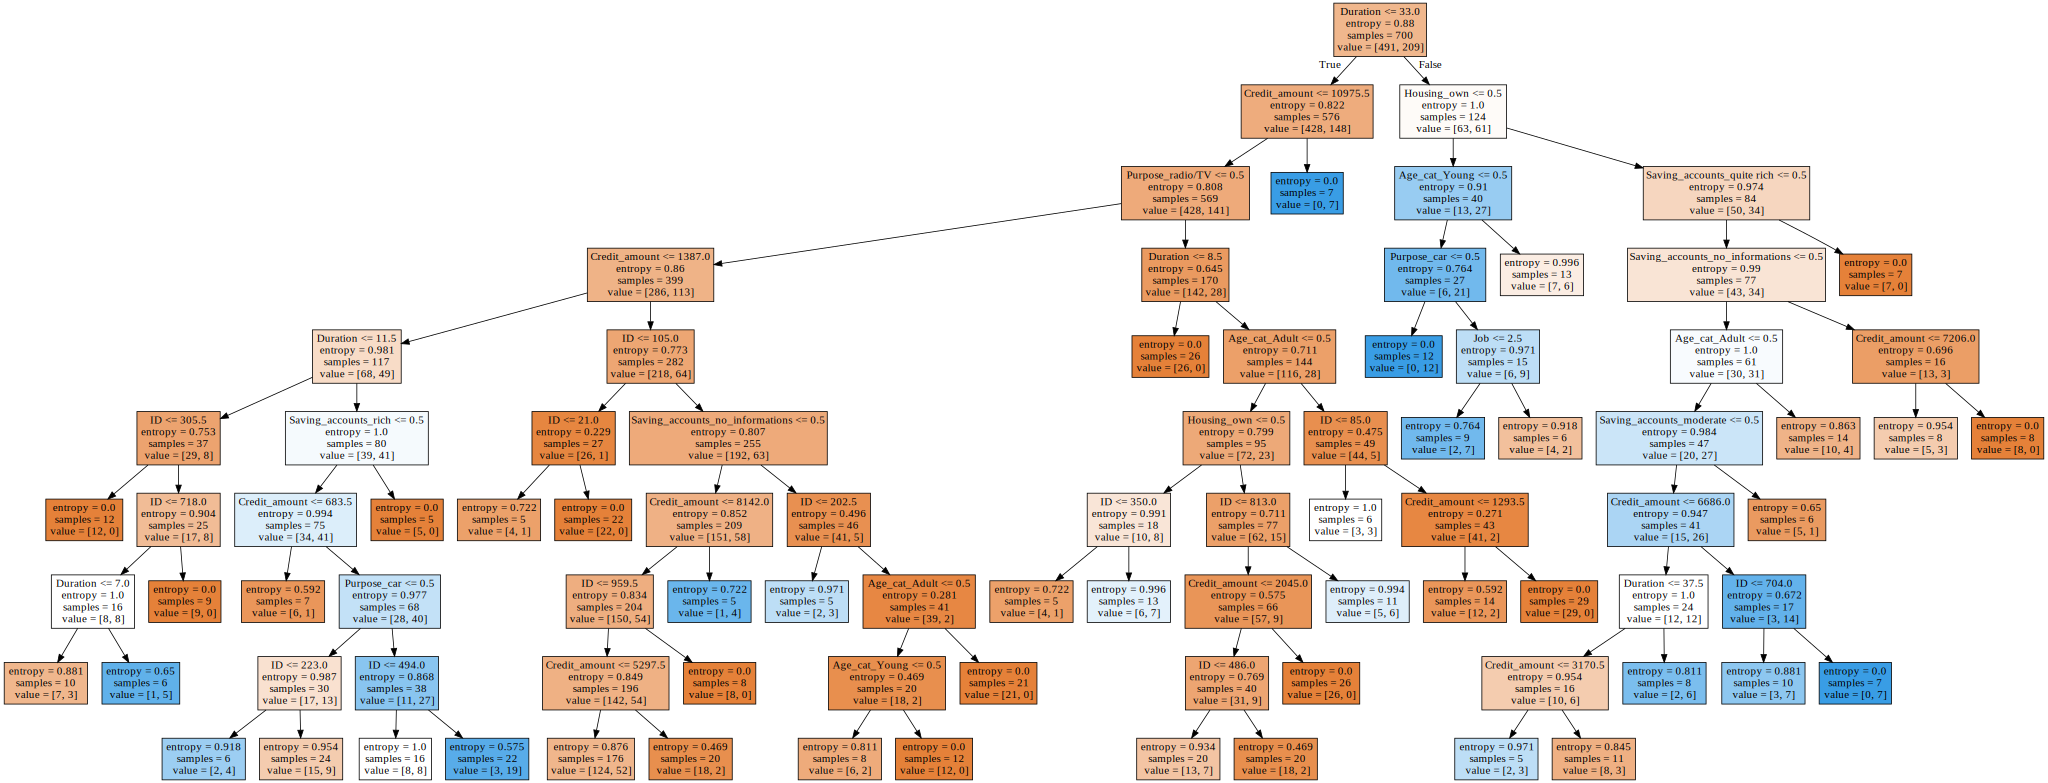

In [61]:
graph = Source(tree.export_graphviz(best_tree, out_file=None,
                                    feature_names=list(X),
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [62]:
param_grid = {
    "n_estimators": [700],
    "max_depth": [3,5, 7, 10,15],
              "max_features": [4,7,15,20],
"criterion":['entropy']
}


model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
rfs = grid_search.fit(X_train, y_train)
probas_test = rfs.predict_proba(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] criterion=entropy, max_depth=3, max_features=4, n_estimators=700 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=3, max_features=4, n_estimators=700, score=0.023809523809523808, total=   0.6s
[CV] criterion=entropy, max_depth=3, max_features=4, n_estimators=700 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, max_features=4, n_estimators=700, score=0.023809523809523808, total=   0.7s
[CV] criterion=entropy, max_depth=3, max_features=4, n_estimators=700 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, max_features=4, n_estimators=700, score=0.047619047619047616, total=   0.5s
[CV] criterion=entropy, max_depth=3, max_features=4, n_estimators=700 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV]  criterion=entropy, max_depth=3, max_features=4, n_estimators=700, score=0.0, total=   0.5s
[CV] criterion=entropy, max_depth=3, max_features=4, n_estimators=700 
[CV]  criterion=entropy, max_depth=3, max_features=4, n_estimators=700, score=0.0, total=   0.5s
[CV] criterion=entropy, max_depth=3, max_features=7, n_estimators=700 
[CV]  criterion=entropy, max_depth=3, max_features=7, n_estimators=700, score=0.09523809523809523, total=   0.6s
[CV] criterion=entropy, max_depth=3, max_features=7, n_estimators=700 
[CV]  criterion=entropy, max_depth=3, max_features=7, n_estimators=700, score=0.07142857142857142, total=   0.6s
[CV] criterion=entropy, max_depth=3, max_features=7, n_estimators=700 
[CV]  criterion=entropy, max_depth=3, max_features=7, n_estimators=700, score=0.09523809523809523, total=   0.6s
[CV] criterion=entropy, max_depth=3, max_features=7, n_estimators=700 
[CV]  criterion=entropy, max_depth=3, max_features=7, n_estimators=700, score=0.047619047619047616, total=   0.5

[CV]  criterion=entropy, max_depth=7, max_features=7, n_estimators=700, score=0.16666666666666666, total=   0.8s
[CV] criterion=entropy, max_depth=7, max_features=7, n_estimators=700 
[CV]  criterion=entropy, max_depth=7, max_features=7, n_estimators=700, score=0.24390243902439024, total=   0.7s
[CV] criterion=entropy, max_depth=7, max_features=15, n_estimators=700 
[CV]  criterion=entropy, max_depth=7, max_features=15, n_estimators=700, score=0.23809523809523808, total=   1.0s
[CV] criterion=entropy, max_depth=7, max_features=15, n_estimators=700 
[CV]  criterion=entropy, max_depth=7, max_features=15, n_estimators=700, score=0.21428571428571427, total=   1.0s
[CV] criterion=entropy, max_depth=7, max_features=15, n_estimators=700 
[CV]  criterion=entropy, max_depth=7, max_features=15, n_estimators=700, score=0.16666666666666666, total=   1.0s
[CV] criterion=entropy, max_depth=7, max_features=15, n_estimators=700 
[CV]  criterion=entropy, max_depth=7, max_features=15, n_estimators=700, 

[CV]  criterion=entropy, max_depth=15, max_features=15, n_estimators=700, score=0.30952380952380953, total=   1.3s
[CV] criterion=entropy, max_depth=15, max_features=15, n_estimators=700 
[CV]  criterion=entropy, max_depth=15, max_features=15, n_estimators=700, score=0.2619047619047619, total=   1.3s
[CV] criterion=entropy, max_depth=15, max_features=15, n_estimators=700 
[CV]  criterion=entropy, max_depth=15, max_features=15, n_estimators=700, score=0.2926829268292683, total=   1.3s
[CV] criterion=entropy, max_depth=15, max_features=20, n_estimators=700 
[CV]  criterion=entropy, max_depth=15, max_features=20, n_estimators=700, score=0.2619047619047619, total=   1.6s
[CV] criterion=entropy, max_depth=15, max_features=20, n_estimators=700 
[CV]  criterion=entropy, max_depth=15, max_features=20, n_estimators=700, score=0.21428571428571427, total=   1.5s
[CV] criterion=entropy, max_depth=15, max_features=20, n_estimators=700 
[CV]  criterion=entropy, max_depth=15, max_features=20, n_estim

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


In [63]:
grid_search.best_score_
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 20,
 'n_estimators': 700}

In [64]:
rf = RandomForestClassifier(max_depth=15, max_features=20, n_estimators=700, random_state=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [65]:
y_pred = rf.predict(X_test)


In [66]:

third_score = accuracy_score(y_test,y_pred)

In [67]:
third_PR = precision_recall_fscore_support(y_test, y_pred, average='macro')

In [68]:
scores =([first_score,second_score,third_score])
scores

[0.7266666666666667, 0.6666666666666666, 0.69]

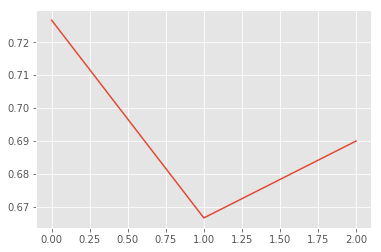

In [69]:
plt.plot([first_score,second_score,third_score])

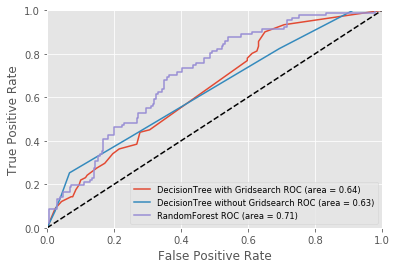

In [70]:


fpr, tpr, thresholds = roc_curve(y_test, search_prob[:,1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('DecisionTree with Gridsearch',roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, predict_t[:,1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('DecisionTree without Gridsearch',roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, probas_test[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandomForest',roc_auc))

pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()